In [1]:
# Import libraries for handling data

import numpy as np
import pandas as pd

# Importing libraries required for Pre-Processing

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

#Importing libraries to create visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Importing libraries required for evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, roc_curve, auc,f1_score

from imblearn.over_sampling import SMOTE
import warnings



In [2]:
# Reading the Data
# Train
ip_df = pd.read_csv("ip_boundaries_countries-1561628631121.csv")
mer_train = pd.read_csv('train_merchant_data-1561627820784.csv')
ord_train = pd.read_csv('train_order_data-1561627847149.csv')
y_train_df = pd.read_csv('train-1561627878332.csv')

# Test
mer_test = pd.read_csv('test_merchant_data-1561627903902.csv')
ord_test = pd.read_csv('test_order_data-1561627931868.csv')
y_test_df= pd.read_csv('test-1561627952093.csv')


## Merging dataframes on Merchant_ID

In [3]:
train_data = pd.merge(left = mer_train, right = ord_train, how = 'outer', on = 'Merchant_ID')
train_data = pd.merge(left = train_data, right = y_train_df, how = 'outer', on = 'Merchant_ID')

test_data = pd.merge(left = mer_test, right = ord_test, how = 'outer', on = 'Merchant_ID')
test_data = pd.merge(left = test_data, right = y_test_df, how = 'outer', on = 'Merchant_ID')

# Exploratory Data Analysis

In [4]:
train_data.head()

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster
0,1746213,50448,2018-05-01 21:15:11,VATQMMZTVOZUT,F,39,48.151.136.76,129697,3b8983a83c7b,2018-07-30 10:59:13,90,SEO,Debit Card,0
1,1746213,338754,2018-04-14 10:13:00,LJCILLBRQZNKS,M,35,94.9.145.169,117390,34b5eb921228,2018-06-15 11:19:47,98,SEO,Internet Banking,0
2,1746213,291127,2018-06-20 07:44:22,JFVHSUGKDAYZV,F,40,58.94.157.121,120162,41a1c86ff08b,2018-08-13 10:06:26,95,SEO,Credit Card,0
3,1746213,319919,2018-06-27 01:41:39,WFRXMPLQYXRMY,M,37,193.187.41.186,128228,e8c3ad80d916,2018-07-22 15:46:51,100,Direct,E-wallet,0
4,1746213,195911,2018-01-05 00:55:41,GGHKWMSWHCMID,F,27,125.96.20.172,136029,e71ab1f26785,2018-04-16 08:02:44,78,SEO,E-wallet,0


In [5]:
train_data.tail()

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster
54208,1746213,222372,2018-05-01 21:58:19,KGVMENGCIAVOK,M,43,247.25.244.31,111700,58d25819870c,2018-06-12 17:18:37,108,Ads,E-wallet,0
54209,1746213,73491,2018-06-11 19:54:13,QJGPOYDONTYCN,M,41,80.30.170.122,122148,569444812870,2018-09-17 08:49:53,130,Ads,Debit Card,1
54210,1746213,176456,2018-01-06 20:05:55,ZOJNAJMGNRQPZ,F,36,188.39.154.217,125450,902290f02e47,2018-04-10 04:20:07,42,Direct,Debit Card,0
54211,1746213,228277,2018-03-09 07:08:10,MQAOMNZFAHZLS,M,18,116.20.101.178,115567,f465038328e7,2018-06-21 03:35:43,82,Ads,Debit Card,0
54212,1746213,259077,2018-04-04 04:15:34,AYPFCYPYQLLMO,F,31,171.47.212.179,137621,7404ad53474a,2018-06-06 06:30:11,98,SEO,E-wallet,0


In [6]:
train_data.shape

(54213, 14)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54213 entries, 0 to 54212
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Ecommerce_Provider_ID       54213 non-null  int64 
 1   Merchant_ID                 54213 non-null  int64 
 2   Merchant_Registration_Date  54213 non-null  object
 3   Registered_Device_ID        54213 non-null  object
 4   Gender                      54213 non-null  object
 5   Age                         54213 non-null  int64 
 6   IP_Address                  54213 non-null  object
 7   Customer_ID                 54213 non-null  int64 
 8   Order_ID                    54213 non-null  object
 9   Date_of_Order               54213 non-null  object
 10  Order_Value_USD             54213 non-null  int64 
 11  Order_Source                54213 non-null  object
 12  Order_Payment_Method        54213 non-null  object
 13  Fraudster                   54213 non-null  in

In [8]:
# Checking Null values
train_data.isnull().sum()

Ecommerce_Provider_ID         0
Merchant_ID                   0
Merchant_Registration_Date    0
Registered_Device_ID          0
Gender                        0
Age                           0
IP_Address                    0
Customer_ID                   0
Order_ID                      0
Date_of_Order                 0
Order_Value_USD               0
Order_Source                  0
Order_Payment_Method          0
Fraudster                     0
dtype: int64

In [9]:
# Checking Unique values
train_data.nunique()

Ecommerce_Provider_ID             1
Merchant_ID                   54213
Merchant_Registration_Date    54213
Registered_Device_ID          51291
Gender                            2
Age                              53
IP_Address                    52028
Customer_ID                   34081
Order_ID                      54213
Date_of_Order                 54161
Order_Value_USD                 116
Order_Source                      3
Order_Payment_Method              5
Fraudster                         2
dtype: int64

In [10]:
train_data.describe(include = 'all')

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster
count,54213.0,54213.000000,54213,54213,54213,54213.000000,54213,54213.000000,54213,54213,54213.000000,54213,54213,54213.00000
unique,NaN,NaN,54213,51291,2,NaN,52028,NaN,54213,54161,NaN,3,5,NaN
top,NaN,NaN,2018-05-01 21:15:11,RJEAMRBBMPWEA,M,NaN,91.161.239.48,NaN,3b8983a83c7b,2018-08-01 01:24:54,NaN,SEO,Credit Card,NaN
freq,NaN,NaN,1,9,31761,NaN,9,NaN,1,2,NaN,21884,21844,NaN
mean,1746213.0,200395.176212,NaN,NaN,NaN,33.122240,NaN,137966.285208,NaN,NaN,92.230240,NaN,NaN,0.09269
std,0.0,115398.486895,NaN,NaN,NaN,8.630091,NaN,15563.516156,NaN,NaN,45.673263,NaN,NaN,0.29000
min,1746213.0,2.000000,NaN,NaN,NaN,18.000000,NaN,111234.000000,NaN,NaN,22.000000,NaN,NaN,0.00000
25%,1746213.0,100997.000000,NaN,NaN,NaN,27.000000,NaN,124471.000000,NaN,NaN,55.000000,NaN,NaN,0.00000
50%,1746213.0,200574.000000,NaN,NaN,NaN,32.000000,NaN,137864.000000,NaN,NaN,88.000000,NaN,NaN,0.00000
75%,1746213.0,300407.000000,NaN,NaN,NaN,39.000000,NaN,151405.000000,NaN,NaN,122.000000,NaN,NaN,0.00000


In [11]:
train_data.describe()

,Ecommerce_Provider_ID,Merchant_ID,Age,Customer_ID,Order_Value_USD,Fraudster
count,54213.0,54213.000000,54213.000000,54213.000000,54213.000000,54213.00000
mean,1746213.0,200395.176212,33.122240,137966.285208,92.230240,0.09269
std,0.0,115398.486895,8.630091,15563.516156,45.673263,0.29000
min,1746213.0,2.000000,18.000000,111234.000000,22.000000,0.00000
25%,1746213.0,100997.000000,27.000000,124471.000000,55.000000,0.00000
50%,1746213.0,200574.000000,32.000000,137864.000000,88.000000,0.00000
75%,1746213.0,300407.000000,39.000000,151405.000000,122.000000,0.00000
max,1746213.0,399993.000000,72.000000,165000.000000,385.000000,1.00000


# Data Pre-Processing

In [12]:
# Dropping columns with too many unique values

train_data = train_data.drop(axis=1, columns= ['Merchant_ID', 'Merchant_Registration_Date', 'Registered_Device_ID', 'Customer_ID', 'Order_ID',
         'Date_of_Order','Ecommerce_Provider_ID','IP_Address'])

In [13]:
train_data.head()

,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster
0,F,39,90,SEO,Debit Card,0
1,M,35,98,SEO,Internet Banking,0
2,F,40,95,SEO,Credit Card,0
3,M,37,100,Direct,E-wallet,0
4,F,27,78,SEO,E-wallet,0


In [14]:
train_data.tail()

,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster
54208,M,43,108,Ads,E-wallet,0
54209,M,41,130,Ads,Debit Card,1
54210,F,36,42,Direct,Debit Card,0
54211,M,18,82,Ads,Debit Card,0
54212,F,31,98,SEO,E-wallet,0


In [15]:
train_data.shape

(54213, 6)

In [16]:
train_data.describe()

,Age,Order_Value_USD,Fraudster
count,54213.000000,54213.000000,54213.00000
mean,33.122240,92.230240,0.09269
std,8.630091,45.673263,0.29000
min,18.000000,22.000000,0.00000
25%,27.000000,55.000000,0.00000
50%,32.000000,88.000000,0.00000
75%,39.000000,122.000000,0.00000
max,72.000000,385.000000,1.00000


In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54213 entries, 0 to 54212
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Gender                54213 non-null  object
 1   Age                   54213 non-null  int64 
 2   Order_Value_USD       54213 non-null  int64 
 3   Order_Source          54213 non-null  object
 4   Order_Payment_Method  54213 non-null  object
 5   Fraudster             54213 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 2.9+ MB


In [18]:
train_data.isnull().sum()

Gender                  0
Age                     0
Order_Value_USD         0
Order_Source            0
Order_Payment_Method    0
Fraudster               0
dtype: int64

In [19]:
train_data.nunique()

Gender                    2
Age                      53
Order_Value_USD         116
Order_Source              3
Order_Payment_Method      5
Fraudster                 2
dtype: int64

In [20]:
# Finding Unique values in the columns and checking if null values are in the form of ?,* etc.

for i in train_data.columns:
    print("*************************************************",i,"************************************************************")
    print()
    print(set(train_data[i].tolist()))
    print()

************************************************* Gender ************************************************************

{'M', 'F'}

************************************************* Age ************************************************************

{18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 72}

************************************************* Order_Value_USD ************************************************************

{22, 25, 28, 30, 32, 35, 38, 40, 42, 45, 48, 50, 52, 55, 58, 60, 62, 65, 68, 70, 72, 75, 78, 80, 82, 85, 88, 90, 92, 95, 98, 100, 102, 105, 108, 110, 112, 115, 118, 120, 122, 125, 128, 130, 132, 135, 138, 140, 142, 145, 148, 150, 152, 155, 158, 160, 162, 165, 168, 170, 172, 175, 178, 180, 182, 185, 188, 190, 192, 195, 198, 200, 202, 205, 208, 210, 212, 215, 218, 220, 222, 225, 228, 230, 232, 235, 238, 240, 2

In [21]:
test_data.shape

(13554, 13)

In [22]:
test_data.dtypes

Ecommerce_Provider_ID          int64
Merchant_ID                    int64
Merchant_Registration_Date    object
Registered_Device_ID          object
Gender                        object
Age                            int64
IP_Address                    object
Customer_ID                    int64
Order_ID                      object
Date_of_Order                 object
Order_Value_USD                int64
Order_Source                  object
Order_Payment_Method          object
dtype: object

In [23]:
train_data.dtypes

Gender                  object
Age                      int64
Order_Value_USD          int64
Order_Source            object
Order_Payment_Method    object
Fraudster                int64
dtype: object

# Visualizations

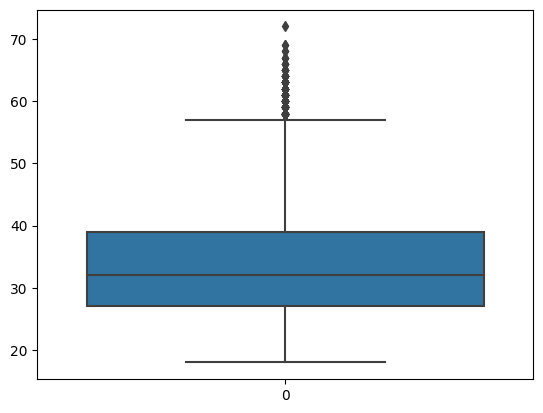

In [24]:
# Checking for Outliers
sns.boxplot(train_data['Age'])
plt.show()

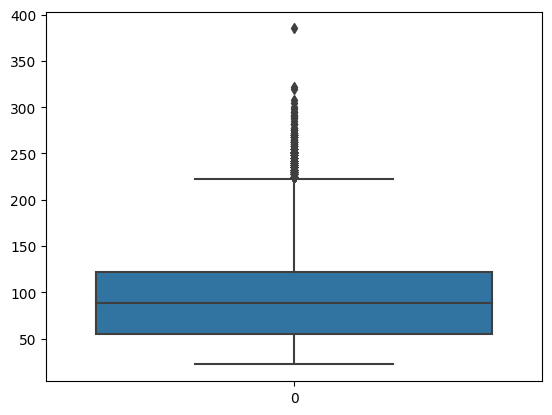

In [25]:
sns.boxplot(train_data['Order_Value_USD'])
plt.show()

In [26]:
# Categorizing the data into different variables based on their datatypes
num_train_data = ['Age', 'Order_Value_USD']
cat_train_data = ['Gender', 'Order_Source', 'Order_Payment_Method','Fraudster']


In [27]:
# Converting object datatypes to categorical
train_data[cat_train_data] = train_data[cat_train_data].astype('category')

In [28]:
num_train_data = train_data.select_dtypes(include=['int64','float64','Int64']).columns
cat_train_data = train_data.select_dtypes(include=['category']).columns
cat_train_data = cat_train_data.drop('Fraudster')

### Checking value count of the target variable showing class imbalance

In [29]:
train_data.Fraudster.value_counts()

0    49188
1     5025
Name: Fraudster, dtype: int64

In [30]:
train_data.Fraudster.value_counts(normalize=True)*100

0    90.731005
1     9.268995
Name: Fraudster, dtype: float64

<ipython-input-31-891f91fa77f9>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,linewidth =2)


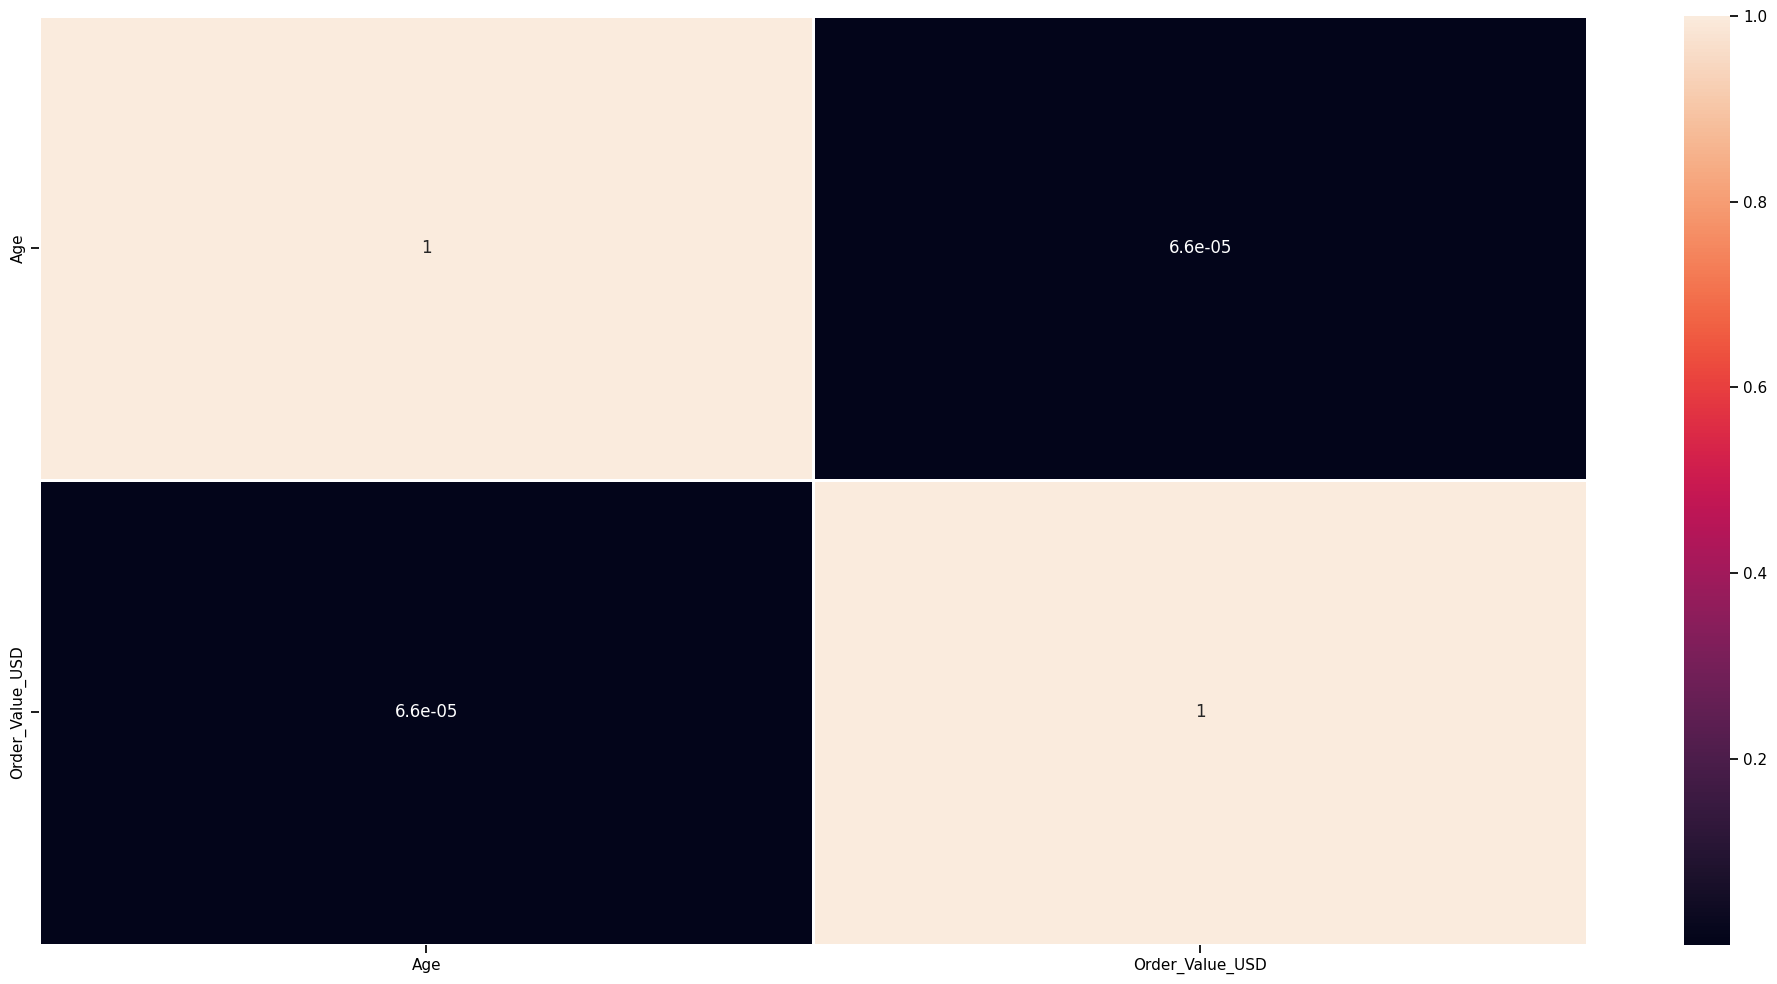

In [31]:
# Checking Correlation between numerical data of train - Showing no correlation

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.set_context('notebook',font_scale = 1)
sns.heatmap(train_data.corr(),annot=True,linewidth =2)
plt.tight_layout()

<ipython-input-32-9c102f01d943>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data["Age"])


<Axes: xlabel='Age', ylabel='Density'>

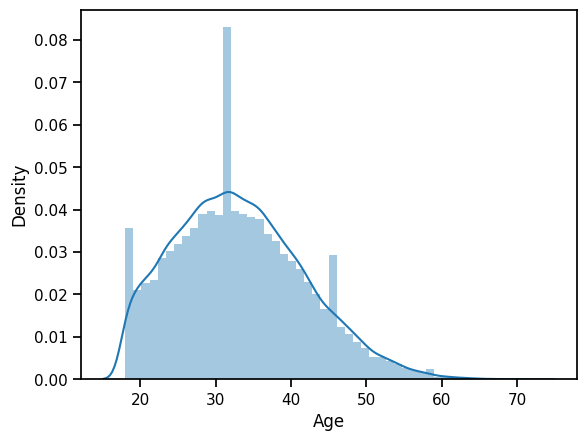

In [32]:
# Check distribution of age

sns.distplot(train_data["Age"])

<ipython-input-33-0521444e7625>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data["Order_Value_USD"])


<Axes: xlabel='Order_Value_USD', ylabel='Density'>

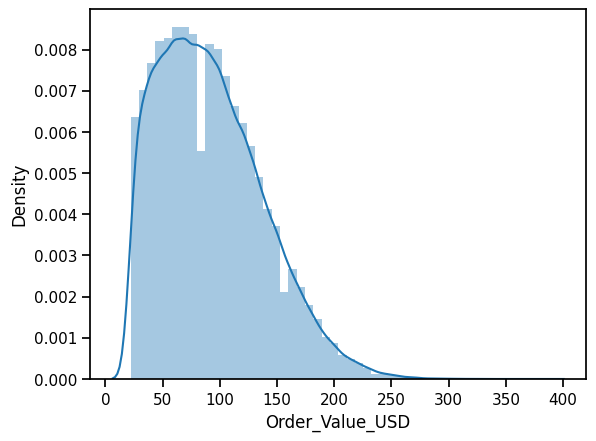

In [33]:
# Check distribution of Order_Value_USD

sns.distplot(train_data["Order_Value_USD"])

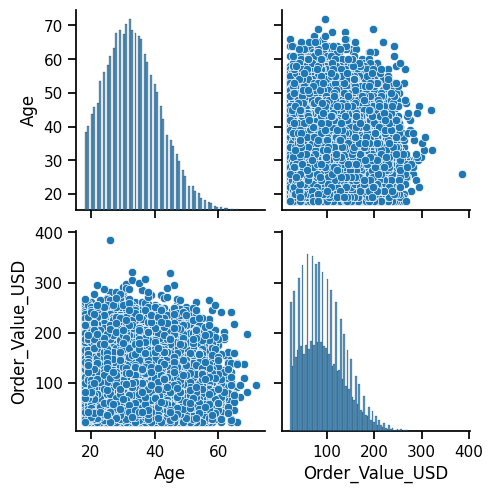

In [34]:
sns.pairplot(train_data)

In [35]:
train_data['Order_Source'].value_counts(normalize = True)

SEO       0.403667
Ads       0.392138
Direct    0.204195
Name: Order_Source, dtype: float64

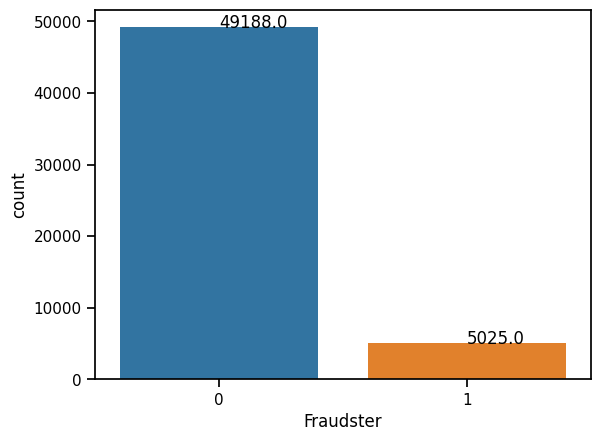

In [36]:
y_count=sns.countplot(x='Fraudster',data=train_data)

for p in y_count.patches:
    height = p.get_height()
    y_count.text(p.get_x()+p.get_width()/2, height + 10, height)

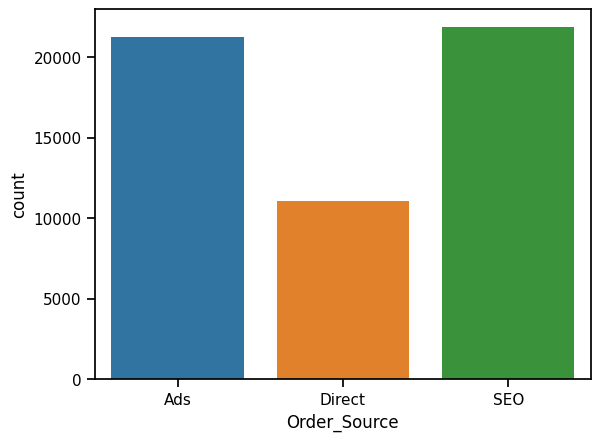

SEO       21884
Ads       21259
Direct    11070
Name: Order_Source, dtype: int64

In [37]:
sns.countplot(x='Order_Source', data=train_data)
plt.show()
train_data.Order_Source.value_counts()

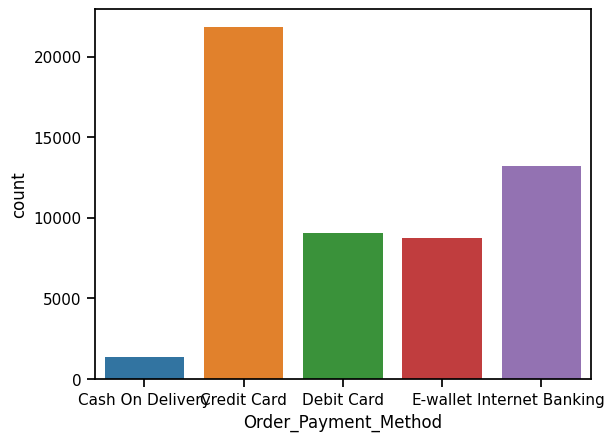

Credit Card         21844
Internet Banking    13193
Debit Card           9070
E-wallet             8739
Cash On Delivery     1367
Name: Order_Payment_Method, dtype: int64

In [38]:
sns.countplot(x='Order_Payment_Method', data=train_data)
plt.show()
train_data.Order_Payment_Method.value_counts()

In [39]:
train_data['Order_Payment_Method'].value_counts(normalize = True)

Credit Card         0.402929
Internet Banking    0.243355
Debit Card          0.167303
E-wallet            0.161197
Cash On Delivery    0.025215
Name: Order_Payment_Method, dtype: float64

# Train and Validation Split on Train Data

In [40]:
from sklearn.model_selection import  RandomizedSearchCV, train_test_split
X = train_data.drop('Fraudster', axis=1)
y = train_data.Fraudster

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.33, random_state=123, stratify=y)

## One Hot Encoding

In [41]:
cat_train_data_cols = X_train.select_dtypes(include=['category']).columns
cat_train_data_cols

Index(['Gender', 'Order_Source', 'Order_Payment_Method'], dtype='object')

In [42]:
encoding = OneHotEncoder(drop = 'first')

encoding.fit(X_train[cat_train_data_cols])

OneHotEncoder(drop='first')

In [43]:
X_train_ohe =encoding.transform(X_train[cat_train_data_cols]).toarray()
X_test_ohe =encoding.transform(X_val[cat_train_data_cols]).toarray()

In [44]:
X_train_ohe

array([[0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

# Standardization

In [45]:
num_train_data_cols = X_train.select_dtypes(include=['int64']).columns
num_train_data_cols

Index(['Age', 'Order_Value_USD'], dtype='object')

In [46]:
scaler = StandardScaler()
scaler.fit(X_train[num_train_data_cols])
num_train_data_cols.shape

(2,)

In [47]:
X_train_std = scaler.transform(X_train[num_train_data_cols])
X_test_std = scaler.transform(X_val[num_train_data_cols])

In [48]:
X_train_std

array([[ 1.83796673, -0.31087414],
       [-1.41031779, -0.09266942],
       [ 1.83796673, -1.14005208],
       ...,
       [ 1.83796673, -0.22359225],
       [ 0.79387527, -0.04902848],
       [-0.4822365 , -1.31461585]])

In [49]:
# Combining the scaled and the one hot encoded features
X_train_concatenate = np.concatenate([X_train_std, X_train_ohe], axis=1)
X_test_concatenate = np.concatenate([X_test_std, X_test_ohe], axis=1)

In [50]:
X_train_concatenate.shape

(36322, 9)

In [51]:
y_train.shape

(36322,)

In [52]:
y_val.shape

(17891,)

# Model Building

## Logistic Regression

### Vanilla Model

In [53]:
logistic = LogisticRegression()

In [54]:
logistic.fit(X_train_concatenate, y_train)

LogisticRegression()

In [55]:
y_pred_train = logistic.predict(X_train_concatenate)
y_pred_test = logistic.predict(X_test_concatenate)

In [56]:
# Evaluate the model on train
confusion = confusion_matrix(y_train, y_pred_train)
accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[32955     0]
 [ 3367     0]]
Accuracy: 0.9073013600572656
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
# Evaluate the model on test
confusion = confusion_matrix(y_val, y_pred_test)
accuracy = accuracy_score(y_val, y_pred_test)
precision = precision_score(y_val, y_pred_test)
recall = recall_score(y_val, y_pred_test)
f1 = f1_score(y_val, y_pred_test)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[16233     0]
 [ 1658     0]]
Accuracy: 0.9073277066681572
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
report_lg = classification_report(y_val, y_pred_test)
print(report_lg)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     16233
           1       0.00      0.00      0.00      1658

    accuracy                           0.91     17891
   macro avg       0.45      0.50      0.48     17891
weighted avg       0.82      0.91      0.86     17891



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression using threshold

In [59]:
# Setting threshold of 0.1 and if probability is greated than 0.1 then the class is predicted as the positive class on the model

train_prob_logi = logistic.predict_proba(X_train_concatenate)[:,1]
test_prob_logi = logistic.predict_proba(X_test_concatenate)[:,1]
train_pred_logi = [0 if x <= 0.1 else 1 for x in train_prob_logi]
test_pred_logi = [0 if x <= 0.1 else 1 for x in test_prob_logi]

In [60]:
# Evaluate the model on train
confusion = confusion_matrix(y_train, train_pred_logi)
accuracy = accuracy_score(y_train, train_pred_logi)
precision = precision_score(y_train, train_pred_logi)
recall = recall_score(y_train, train_pred_logi)
f1 = f1_score(y_train, train_pred_logi)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[27208  5747]
 [ 2674   693]]
Accuracy: 0.7681570398105831
Precision: 0.10760869565217392
Recall: 0.20582120582120583
F1 Score: 0.14132762312633834


In [61]:
# Evaluate the model on test
confusion = confusion_matrix(y_val, test_pred_logi)
accuracy = accuracy_score(y_val, test_pred_logi)
precision = precision_score(y_val, test_pred_logi)
recall = recall_score(y_val, test_pred_logi)
f1 = f1_score(y_val, test_pred_logi)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[13375  2858]
 [ 1332   326]]
Accuracy: 0.7658040355485999
Precision: 0.10238693467336683
Recall: 0.19662243667068757
F1 Score: 0.13465510119785212


In [62]:
report_lgt = classification_report(y_val, test_pred_logi)
print(report_lgt)

              precision    recall  f1-score   support

           0       0.91      0.82      0.86     16233
           1       0.10      0.20      0.13      1658

    accuracy                           0.77     17891
   macro avg       0.51      0.51      0.50     17891
weighted avg       0.83      0.77      0.80     17891



## Support Vector Classifier

### Vanilla Model

In [63]:
linear_svm = SVC(kernel='linear')

In [64]:
linear_svm.fit(X=X_train_concatenate, y= y_train)

SVC(kernel='linear')

In [65]:
train_prediction = linear_svm.predict(X_train_concatenate)
test_prediction = linear_svm.predict(X_test_concatenate)

In [66]:
# Evaluate the model on train
confusion = confusion_matrix(y_train, train_prediction)
accuracy = accuracy_score(y_train, train_prediction)
precision = precision_score(y_train, train_prediction)
recall = recall_score(y_train, train_prediction)
f1 = f1_score(y_train, train_prediction)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[32955     0]
 [ 3367     0]]
Accuracy: 0.9073013600572656
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
# Evaluate the model on test
confusion = confusion_matrix(y_val, test_prediction)
accuracy = accuracy_score(y_val, test_prediction)
precision = precision_score(y_val, test_prediction)
recall = recall_score(y_val, test_prediction)
f1 = f1_score(y_val, test_prediction)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[16233     0]
 [ 1658     0]]
Accuracy: 0.9073277066681572
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
report_svm = classification_report(y_val, test_prediction)
print(report_svm)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     16233
           1       0.00      0.00      0.00      1658

    accuracy                           0.91     17891
   macro avg       0.45      0.50      0.48     17891
weighted avg       0.82      0.91      0.86     17891



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SMOTE

In [69]:
smote = SMOTE(random_state=123)

In [70]:
X_train_sm, y_train_sm = smote.fit_resample(X_train_concatenate, y_train)

In [71]:
np.unique(y_train, return_counts= True)

(array([0, 1]), array([32955,  3367]))

In [72]:
np.unique(y_train_sm, return_counts= True)

(array([0, 1]), array([32955, 32955]))

## Random Forest Classifier



### Vanilla Model

In [73]:
rf = RandomForestClassifier()

In [74]:
rf.fit(X=X_train_concatenate, y= y_train)

RandomForestClassifier()

In [75]:
train_pred_rf = rf.predict(X_train_concatenate)
test_pred_rf = rf.predict(X_test_concatenate)

In [76]:
# Evaluate the model on train
confusion = confusion_matrix(y_train, train_pred_rf)
accuracy = accuracy_score(y_train, train_pred_rf)
precision = precision_score(y_train, train_pred_rf)
recall = recall_score(y_train, train_pred_rf)
f1 = f1_score(y_train, train_pred_rf)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[32509   446]
 [ 1004  2363]]
Accuracy: 0.9600792907879522
Precision: 0.8412246351014596
Recall: 0.7018117018117018
F1 Score: 0.765220207253886


In [77]:
# Evaluate the model on test
confusion = confusion_matrix(y_val, test_pred_rf)
accuracy = accuracy_score(y_val, test_pred_rf)
precision = precision_score(y_val, test_pred_rf)
recall = recall_score(y_val, test_pred_rf)
f1 = f1_score(y_val, test_pred_rf)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[15663   570]
 [ 1032   626]]
Accuracy: 0.9104577720641663
Precision: 0.5234113712374582
Recall: 0.3775633293124246
F1 Score: 0.4386825508058865


In [78]:
report_rf = classification_report(y_val, test_pred_rf)
print(report_rf)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     16233
           1       0.52      0.38      0.44      1658

    accuracy                           0.91     17891
   macro avg       0.73      0.67      0.70     17891
weighted avg       0.90      0.91      0.90     17891



### Random Forest after Upsampling using SMOTE

In [79]:
rf_sm = RandomForestClassifier()

In [80]:
rf_sm.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

In [81]:
train_pred = rf_sm.predict(X_train_sm)
test_pred = rf_sm.predict(X_test_concatenate)

In [82]:
# Evaluate the model on train
confusion = confusion_matrix(y_train_sm, train_pred)
accuracy = accuracy_score(y_train_sm, train_pred)
precision = precision_score(y_train_sm, train_pred)
recall = recall_score(y_train_sm, train_pred)
f1 = f1_score(y_train_sm, train_pred)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[32151   804]
 [  701 32254]]
Accuracy: 0.977165832195418
Precision: 0.9756791094440075
Recall: 0.9787285692611136
F1 Score: 0.9772014603184221


In [83]:
# Evaluate the model on test
confusion = confusion_matrix(y_val, test_pred)
accuracy = accuracy_score(y_val, test_pred)
precision = precision_score(y_val, test_pred)
recall = recall_score(y_val, test_pred)
f1 = f1_score(y_val, test_pred)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[15057  1176]
 [  894   764]]
Accuracy: 0.8842993683975183
Precision: 0.3938144329896907
Recall: 0.46079613992762364
F1 Score: 0.424680377987771


In [84]:
report_rf_sm = classification_report(y_val, test_pred)
print(report_rf_sm)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     16233
           1       0.39      0.46      0.42      1658

    accuracy                           0.88     17891
   macro avg       0.67      0.69      0.68     17891
weighted avg       0.89      0.88      0.89     17891



### Random Forest by applying threshold

In [85]:
# Setting threshold of 0.1 and if probability is greated than 0.1 then the class is predicted as the positive class on the model

train_prob_rf = rf.predict_proba(X_train_concatenate)[:,1]
test_prob_rf = rf.predict_proba(X_test_concatenate)[:,1]
train_pred_rft = [0 if x <= 0.1 else 1 for x in train_prob_rf]
test_pred_rft = [0 if x <= 0.1 else 1 for x in test_prob_rf]

In [86]:
# Evaluate the model on train
confusion = confusion_matrix(y_train, train_pred_rft)
accuracy = accuracy_score(y_train, train_pred_rft)
precision = precision_score(y_train, train_pred_rft)
recall = recall_score(y_train, train_pred_rft)
f1 = f1_score(y_train, train_pred_rft)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[29569  3386]
 [    0  3367]]
Accuracy: 0.9067782611089698
Precision: 0.498593217829113
Recall: 1.0
F1 Score: 0.6654150197628458


In [87]:
# Evaluate the model on test
confusion = confusion_matrix(y_val, test_pred_rft)
accuracy = accuracy_score(y_val, test_pred_rft)
precision = precision_score(y_val, test_pred_rft)
recall = recall_score(y_val, test_pred_rft)
f1 = f1_score(y_val, test_pred_rft)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[13269  2964]
 [  684   974]]
Accuracy: 0.7960985970599743
Precision: 0.2473336719146775
Recall: 0.5874547647768396
F1 Score: 0.34810578984989277


In [90]:
report_rft = classification_report(y_val, test_pred_rft)
print(report_rft)

              precision    recall  f1-score   support

           0       0.95      0.82      0.88     16233
           1       0.25      0.59      0.35      1658

    accuracy                           0.80     17891
   macro avg       0.60      0.70      0.61     17891
weighted avg       0.89      0.80      0.83     17891



### Random Forest Using Cross-Validation

In [91]:
rfc_grid = RandomForestClassifier()

In [102]:
# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 70],
    'max_depth': [5, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [2]
}

In [103]:
grid_search = GridSearchCV(rfc_grid, param_grid, cv=5, n_jobs=-1, verbose=2)

In [104]:
grid_search.fit(X_train_concatenate, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [50, 70]},
             verbose=2)

In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
train_predictions_rf_gscv = grid_search.predict(X_train_concatenate)
test_predictions_rf_gscv = grid_search.predict(X_test_concatenate)

In [107]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 70}


In [108]:
best_model = grid_search.best_estimator_

In [109]:
# Evaluate the model on train
confusion = confusion_matrix(y_train, train_predictions_rf_gscv)
accuracy = accuracy_score(y_train, train_predictions_rf_gscv)
precision = precision_score(y_train, train_predictions_rf_gscv)
recall = recall_score(y_train, train_predictions_rf_gscv)
f1 = f1_score(y_train, train_predictions_rf_gscv)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[32953     2]
 [ 3296    71]]
Accuracy: 0.9092010351852872
Precision: 0.9726027397260274
Recall: 0.021087021087021086
F1 Score: 0.04127906976744186


In [110]:
# Evaluate the model on test
confusion = confusion_matrix(y_val, test_predictions_rf_gscv)
accuracy = accuracy_score(y_val, test_predictions_rf_gscv)
precision = precision_score(y_val, test_predictions_rf_gscv)
recall = recall_score(y_val, test_predictions_rf_gscv)
f1 = f1_score(y_val, test_predictions_rf_gscv)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[16227     6]
 [ 1643    15]]
Accuracy: 0.9078307528925158
Precision: 0.7142857142857143
Recall: 0.009047044632086852
F1 Score: 0.01786777843954735


In [111]:
report_rf_csv = classification_report(y_val, test_predictions_rf_gscv)
print(report_rf_csv)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     16233
           1       0.71      0.01      0.02      1658

    accuracy                           0.91     17891
   macro avg       0.81      0.50      0.48     17891
weighted avg       0.89      0.91      0.87     17891



### SVM(With SMOTE)

In [112]:
linear_svm.fit(X=X_train_sm, y= y_train_sm)

SVC(kernel='linear')

In [113]:
train_prediction_sm = linear_svm.predict(X_train_sm)
test_prediction_sm = linear_svm.predict(X_test_concatenate)

In [114]:
# Train
confusion = confusion_matrix(y_train_sm, train_prediction_sm)
accuracy = accuracy_score(y_train_sm, train_prediction_sm)
precision = precision_score(y_train_sm, train_prediction_sm)
recall = recall_score(y_train_sm, train_prediction_sm)
f1 = f1_score(y_train_sm, train_prediction_sm)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[26306  6649]
 [25273  7682]]
Accuracy: 0.5156728872705204
Precision: 0.5360407508199009
Recall: 0.23310575026551358
F1 Score: 0.32491646576153616


In [115]:
# Test
confusion = confusion_matrix(y_val, test_prediction_sm)
accuracy = accuracy_score(y_val, test_prediction_sm)
precision = precision_score(y_val, test_prediction_sm)
recall = recall_score(y_val, test_prediction_sm)
f1 = f1_score(y_val, test_prediction_sm)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[12983  3250]
 [ 1264   394]]
Accuracy: 0.7476943714716897
Precision: 0.10812294182217344
Recall: 0.2376357056694813
F1 Score: 0.14862316107129384


In [116]:
report_svm_sm = classification_report(y_val, test_prediction_sm)
print(report_svm_sm)

              precision    recall  f1-score   support

           0       0.91      0.80      0.85     16233
           1       0.11      0.24      0.15      1658

    accuracy                           0.75     17891
   macro avg       0.51      0.52      0.50     17891
weighted avg       0.84      0.75      0.79     17891



## XGBoost Classifier

### Vanilla Model

In [117]:
import xgboost as xgb

In [118]:
model_xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
model_xgb.fit(X_train_concatenate, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [119]:
y_pred_xgb_train = model_xgb.predict(X_train_concatenate)
y_pred_xgb_test = model_xgb.predict(X_test_concatenate)

In [120]:
# Evaluate the model using a confusion matrix and other metrics
confusion = confusion_matrix(y_train, y_pred_xgb_train)
accuracy = accuracy_score(y_train, y_pred_xgb_train)
precision = precision_score(y_train, y_pred_xgb_train)
recall = recall_score(y_train, y_pred_xgb_train)
f1 = f1_score(y_train, y_pred_xgb_train)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[32934    21]
 [ 3157   210]]
Accuracy: 0.9125048180166291
Precision: 0.9090909090909091
Recall: 0.062370062370062374
F1 Score: 0.11673151750972763


In [121]:
confusion = confusion_matrix(y_val, y_pred_xgb_test)
accuracy = accuracy_score(y_val, y_pred_xgb_test)
precision = precision_score(y_val, y_pred_xgb_test)
recall = recall_score(y_val, y_pred_xgb_test)
f1 = f1_score(y_val, y_pred_xgb_test)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[16209    24]
 [ 1588    70]]
Accuracy: 0.909898831814879
Precision: 0.7446808510638298
Recall: 0.04221954161640531
F1 Score: 0.07990867579908675


In [122]:
report_xgb = classification_report(y_val, y_pred_xgb_test)
print(report_xgb)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     16233
           1       0.74      0.04      0.08      1658

    accuracy                           0.91     17891
   macro avg       0.83      0.52      0.52     17891
weighted avg       0.90      0.91      0.87     17891



### XgBoost Using SMOTE

In [123]:
model_xgb_sm = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
model_xgb_sm.fit(X=X_train_sm, y= y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [124]:
y_pred_xgb_train_sm = model_xgb.predict(X_train_sm)
y_pred_xgb_test_sm = model_xgb.predict(X_test_concatenate)

In [125]:
confusion = confusion_matrix(y_train_sm, y_pred_xgb_train_sm)
accuracy = accuracy_score(y_train_sm, y_pred_xgb_train_sm)
precision = precision_score(y_train_sm, y_pred_xgb_train_sm)
recall = recall_score(y_train_sm, y_pred_xgb_train_sm)
f1 = f1_score(y_train_sm, y_pred_xgb_train_sm)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[32934    21]
 [31370  1585]]
Accuracy: 0.5237293278713397
Precision: 0.9869240348692403
Recall: 0.04809588833257472
F1 Score: 0.09172188304736552


In [126]:
confusion = confusion_matrix(y_val, y_pred_xgb_test_sm)
accuracy = accuracy_score(y_val, y_pred_xgb_test_sm)
precision = precision_score(y_val, y_pred_xgb_test_sm)
recall = recall_score(y_val, y_pred_xgb_test_sm)
f1 = f1_score(y_val, y_pred_xgb_test_sm)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[16209    24]
 [ 1588    70]]
Accuracy: 0.909898831814879
Precision: 0.7446808510638298
Recall: 0.04221954161640531
F1 Score: 0.07990867579908675


In [127]:
report_xgb_sm = classification_report(y_val, y_pred_xgb_test_sm)
print(report_xgb_sm)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     16233
           1       0.74      0.04      0.08      1658

    accuracy                           0.91     17891
   macro avg       0.83      0.52      0.52     17891
weighted avg       0.90      0.91      0.87     17891



### XgBoost Using Threshold

In [128]:
train_prob = model_xgb.predict_proba(X_train_concatenate)[:,1]
test_prob = model_xgb.predict_proba(X_test_concatenate)[:,1]
train_pred = [0 if x <= 0.1 else 1 for x in train_prob]
test_pred = [0 if x <= 0.1 else 1 for x in test_prob]

In [129]:
confusion = confusion_matrix(y_train, train_pred)
accuracy = accuracy_score(y_train, train_pred)
precision = precision_score(y_train, train_pred)
recall = recall_score(y_train, train_pred)
f1 = f1_score(y_train, train_pred)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[24099  8856]
 [  836  2531]]
Accuracy: 0.7331644733219537
Precision: 0.2222710108017915
Recall: 0.7517077517077517
F1 Score: 0.3430933984004338


In [130]:
confusion = confusion_matrix(y_val, test_pred)
accuracy = accuracy_score(y_val, test_pred)
precision = precision_score(y_val, test_pred)
recall = recall_score(y_val, test_pred)
f1 = f1_score(y_val, test_pred)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[11354  4879]
 [  752   906]]
Accuracy: 0.6852607456262926
Precision: 0.15661192739844426
Recall: 0.5464414957780458
F1 Score: 0.24345022168480454


In [131]:
report_xgb_thr = classification_report(y_val, test_pred)
print(report_xgb_thr)

              precision    recall  f1-score   support

           0       0.94      0.70      0.80     16233
           1       0.16      0.55      0.24      1658

    accuracy                           0.69     17891
   macro avg       0.55      0.62      0.52     17891
weighted avg       0.87      0.69      0.75     17891

